## Problem statement

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Final Evaluation projets\Second-Phase-Evaluation-Projects--1-\Global Power Plant Database\database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Columns

In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

-	`country` : 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
-	`country_long` : longer form of the country designation
-	`name` : name or title of the power plant, generally in Romanized form
-	`gppd_idnr` : 10 or 12 character identifier for the power plant
-	`capacity_mw` : electrical generating capacity in megawatts
-	`latitude` : geolocation in decimal degrees; WGS84 (EPSG:4326)
-	`longitude` : geolocation in decimal degrees; WGS84 (EPSG:4326)
-	`primary_fuel` : energy source used in primary electricity generation or export
-	`other_fuel1` : energy source used in electricity generation or export
-	`other_fuel2` : energy source used in electricity generation or export
-	`other_fuel3` : energy source used in electricity generation or export
-	`commissioning_year` : year of plant operation, weighted by unit-capacity when data is available
-	`owner` : majority shareholder of the power plant, generally in Romanized form
-	`source` : entity reporting the data; could be an organization, report, or document, generally in Romanized form
-	`url` : web document corresponding to the source field
-	`geolocation_source` : attribution for geolocation information
-	`wepp_id` : a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
-	`year_of_capacity_data` : year the capacity information was reported
-	`generation_gwh_2013` : electricity generation in gigawatt-hours reported for the year 2013
-	`generation_gwh_2014` : electricity generation in gigawatt-hours reported for the year 2014
-	`generation_gwh_2015` : electricity generation in gigawatt-hours reported for the year 2015
-	`generation_gwh_2016` : electricity generation in gigawatt-hours reported for the year 2016
-	`generation_gwh_2017` : electricity generation in gigawatt-hours reported for the year 2017
-	`generation_gwh_2018` : electricity generation in gigawatt-hours reported for the year 2018
-	`generation_gwh_2019` : electricity generation in gigawatt-hours reported for the year 2019
-	`generation_data_source` : attribution for the reported generation information
-	`estimated_generation_gwh` : estimated electricity generation in gigawatt-hours

#### Target
1. Primary Fuel    
2. capacity_mw 


#### Analising basic metrics

In [4]:
df.shape

(907, 27)

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

- There are Many  Null Values
- There are few columns in which There is no data Those columns can be removed
- other_fuel2 column can also be removed since There is 1 data in it

In [7]:
for i in df.columns:
    if df[i].isnull().sum() >= 906:
        df.drop(columns=i,inplace=True)

df.shape        


(907, 21)

In [8]:
num_col = []
obj_col = []
for i in df.columns:
    if df[i].dtype == object:
        obj_col.append(i)
    else:
        num_col.append(i)


In [9]:
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

#### Findings
- categorica columns are
    - country
    - country_long
    - primary_fuel
    - other_fuel1
    - geolocation_source
    - year_of_capacity_data
    - generation_data_source 
- country & country_long columns ca be removed, Since Whole columnn of these are filled with only one value

In [10]:
df.drop(columns=['country','country_long'],inplace=True)

In [11]:
df.shape

(907, 19)

In [12]:
df.describe(include='all')

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907,907,907.000000,861.000000,861.000000,907,198,527.000000,342,907,907,888,519.0,398.000000,422.000000,434.000000,440.000000,448.000000,449
unique,907,907,NaN,NaN,NaN,8,3,NaN,280,191,304,3,NaN,NaN,NaN,NaN,NaN,NaN,1
top,ACME Solar Tower,WRI1020239,NaN,NaN,NaN,Coal,Oil,NaN,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority
freq,1,1,NaN,NaN,NaN,258,195,NaN,4,519,519,765,NaN,NaN,NaN,NaN,NaN,NaN,449
mean,NaN,NaN,326.223755,21.197918,77.464907,NaN,NaN,1997.091082,NaN,NaN,NaN,NaN,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,NaN,NaN,590.085456,6.239612,4.939316,NaN,NaN,17.082868,NaN,NaN,NaN,NaN,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,16.725000,16.773900,74.256200,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,NaN,NaN,59.200000,21.780000,76.719500,NaN,NaN,2001.000000,NaN,NaN,NaN,NaN,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,NaN,NaN,385.250000,25.512400,79.440800,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN


#### Findings
- Name,gppd_idnr and url are unwanted columns since all of them are unique and dosenot , contribute for Target.

- Source and owner columns are having similar data and they are not required mostly. owner column is having 595 Null valuew while source column dosenot Have any null values. So, for the sake of our problem we can keep Source column and remove owner column .

-  Distribution
    - Normally distributed (Since Mean ~= Median)
        - latitude
        - longitude
        - commissioning_year
        - year_of_capacity_data
    - Right skewed (mean > median)
        - capacity_mw
        - generation_gwh_2014
        - generation_gwh_2015
        - generation_gwh_2016
        - generation_gwh_2017
        - generation_gwh_2018
        

In [13]:
df.drop(columns=['name','gppd_idnr','url','owner'],inplace=True)

In [14]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Missing value treatment

In [15]:
df.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [16]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Filling NANs of Few float data type columns with mean
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

In [18]:
print('other_fuel1 :',df.other_fuel1.unique(),'\n\n','geolocation_source :',df.geolocation_source.unique(),'\n\n','year_of_capacity_data :',df.year_of_capacity_data.unique(),'\n\n','commissioning_year :',df.commissioning_year.unique(),'\n\n','generation_data_source :',df.generation_data_source.unique())


other_fuel1 : [nan 'Oil' 'Cogeneration' 'Gas'] 

 geolocation_source : ['National Renewable Energy Laboratory' 'WRI' nan 'Industry About'] 

 year_of_capacity_data : [  nan 2019.] 

 commissioning_year : [2011.   nan 2004. 2015. 2005. 1970. 2010. 2008. 2014. 1985. 1986. 1987.
 2000. 1989. 2017. 1977. 1980. 2003. 1984. 1976. 1996. 1991. 2002. 2001.
 2006. 2007. 1988. 1973. 2012. 1968. 1964. 2016. 2013. 1962. 1998. 1993.
 1997. 1999. 1994. 1975. 1992. 1972. 1979. 1967. 1995. 1983. 1981. 2018.
 1959. 1961. 1957. 1978. 1963. 1971. 1955. 2009. 1966. 1965. 1960. 1949.
 1952. 1990. 1982. 1937. 1956. 1946. 1958. 1943. 1954. 1969. 1939. 1927.
 1974. 1953.] 

 generation_data_source : [nan 'Central Electricity Authority']


In [19]:
# Replacing Nan of other_fuel1,geolocation_source and generation_data_source with 'Other'
df['other_fuel1'] = df['other_fuel1'].fillna('other')
df['geolocation_source'] = df['geolocation_source'].fillna('other')
df['generation_data_source'] = df['generation_data_source'].fillna('other')

# Replacing Nan of year_of_capacity_data with 0
df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(0)

# Replacing Nan of commissioning_year with median
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())

In [20]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,other,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,other
1,98.0,24.7663,74.6090,Coal,other,2001.0,Ultratech Cement ltd,WRI,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,other
2,39.2,21.9038,69.3732,Wind,other,2001.0,CDM,WRI,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,other
3,135.0,23.8712,91.3602,Gas,other,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,other,2001.0,Karnataka Power Corporation Limited,Industry About,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,other
904,25.5,15.2758,75.5811,Wind,other,2001.0,CDM,WRI,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,other
905,80.0,24.3500,73.7477,Coal,other,2001.0,Hindustan Zinc ltd,WRI,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,other


#### Data Visualization

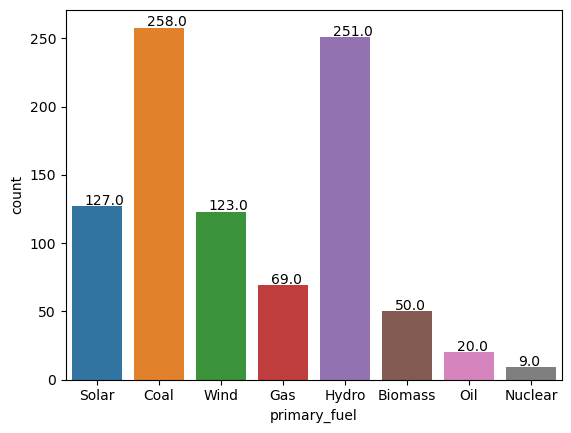

In [21]:
ax = sns.countplot(data=df,x="primary_fuel")

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+1))

plt.show()

- we can observe that in india most of the power plants run on coal and hydro Energy.
- There are only 9 Nuclear Power Plants in India

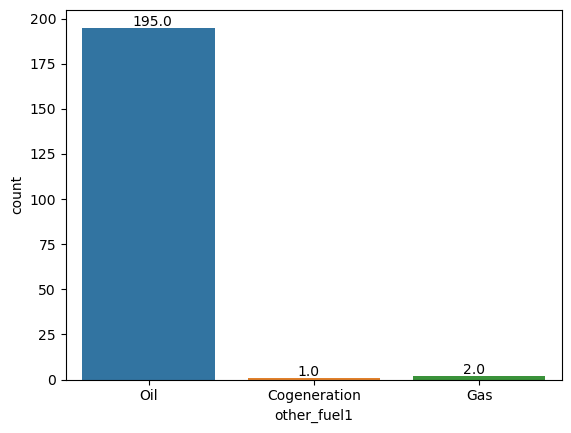

In [22]:
ax = sns.countplot(data=df[-(df.other_fuel1 == 'other')],x="other_fuel1")

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1))

plt.show()

- we can observe that Secondary Fuel is mostly Oil

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   other_fuel1             907 non-null    object 
 5   commissioning_year      907 non-null    float64
 6   source                  907 non-null    object 
 7   geolocation_source      907 non-null    object 
 8   year_of_capacity_data   907 non-null    float64
 9   generation_gwh_2014     907 non-null    float64
 10  generation_gwh_2015     907 non-null    float64
 11  generation_gwh_2016     907 non-null    float64
 12  generation_gwh_2017     907 non-null    float64
 13  generation_gwh_2018     907 non-null    float64
 14  generation_data_source  907 non-null    ob

In [24]:
num_col = []
obj_col = []
for i in df.columns:
    if df[i].dtype == object:
        obj_col.append(i)
    else:
        num_col.append(i)


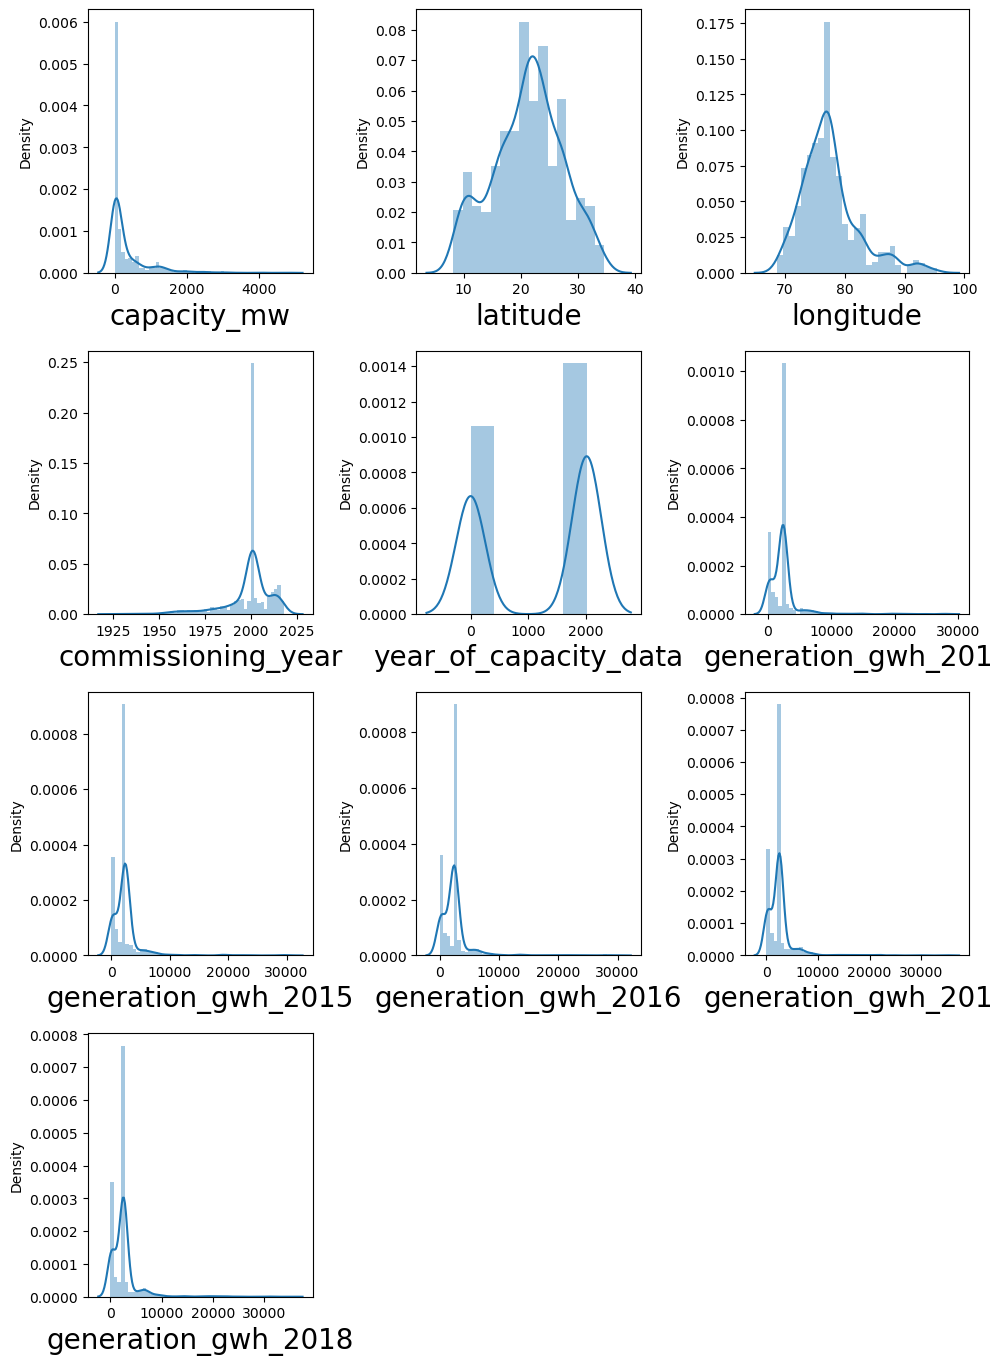

In [25]:
plt.figure(figsize=(10,20))
pn = 1
for column in num_col:
    
    sns.distplot(df[column],ax=plt.subplot(6,3,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()      

- As discussed earlier we can observe that most of the columns are right skewed

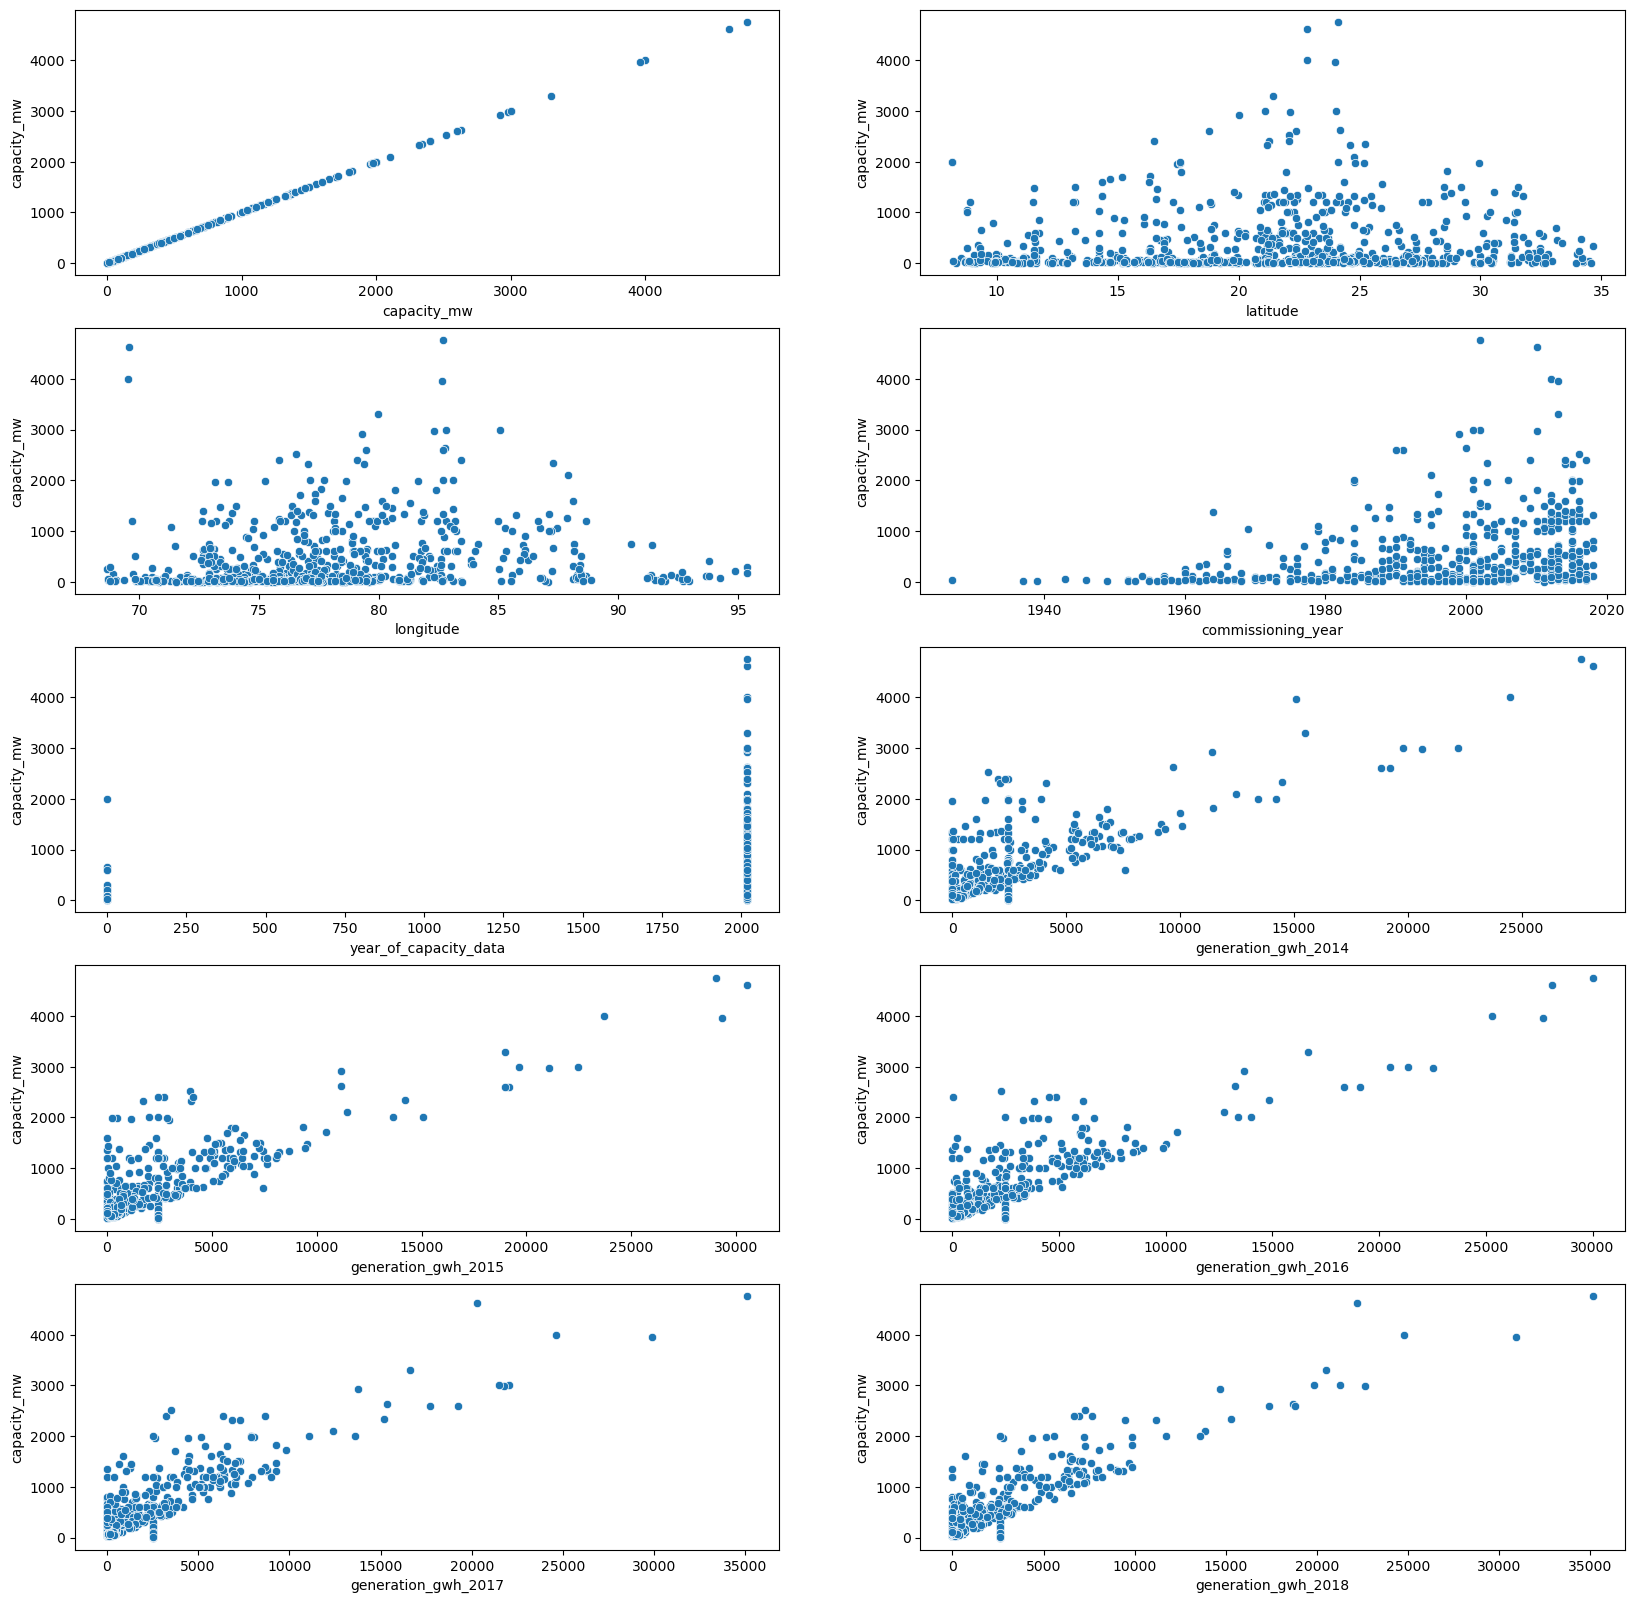

In [26]:
plt.figure(figsize=(20,20))
pn = 1
for i in num_col:
    if pn <= 10:
        sns.scatterplot(x=i,y='capacity_mw',data=df,ax=plt.subplot(5,2,pn))
        pn+=1

- we can observe that There is no corelation between latitude and capacity_mw and longitude and capacity_mw
- All generation_gwh columns are Positively co-reated with capacity_mw

In [27]:
dfg_1=df.groupby("primary_fuel").mean()
dfg_1['capacity_mw']

primary_fuel
Biomass     20.065200
Coal       797.826434
Gas        364.818928
Hydro      185.026972
Nuclear    975.555556
Oil         88.942000
Solar       21.712598
Wind        33.429675
Name: capacity_mw, dtype: float64

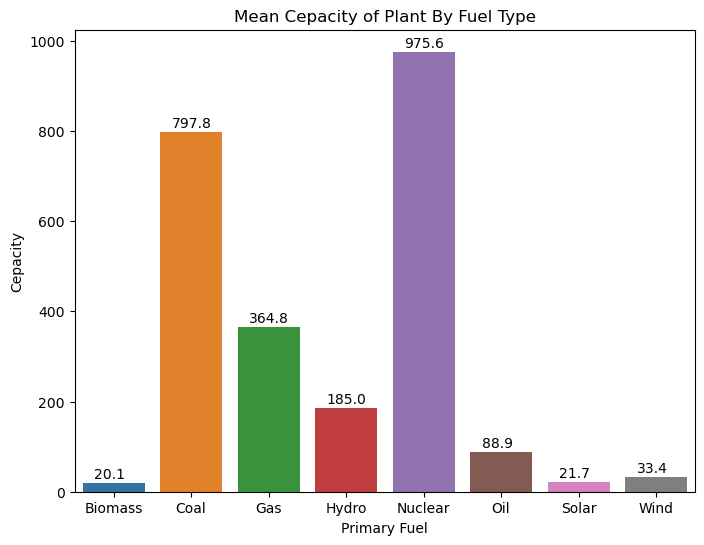

In [28]:
plt.figure(figsize=(8, 6))
ax=sns.barplot(x=dfg_1.index, y=dfg_1['capacity_mw'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
plt.title('Mean Cepacity of Plant By Fuel Type')
plt.xlabel('Primary Fuel')
plt.ylabel('Cepacity')
plt.show()

- We can observe that Nuclear Power Plants have Highest Cepacity followed by Coal Power Plants

#### Encoading Categorical Columns

In [29]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df[obj_col]=df[obj_col].apply(LE.fit_transform)

In [30]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,3,2011.0,109,1,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,98.0,24.7663,74.6090,1,3,2001.0,174,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,39.2,21.9038,69.3732,7,3,2001.0,21,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,135.0,23.8712,91.3602,2,3,2004.0,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,22,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,3.0,12.8932,78.1654,6,3,2001.0,77,0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
904,25.5,15.2758,75.5811,7,3,2001.0,21,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
905,80.0,24.3500,73.7477,1,3,2001.0,59,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


### Outliers

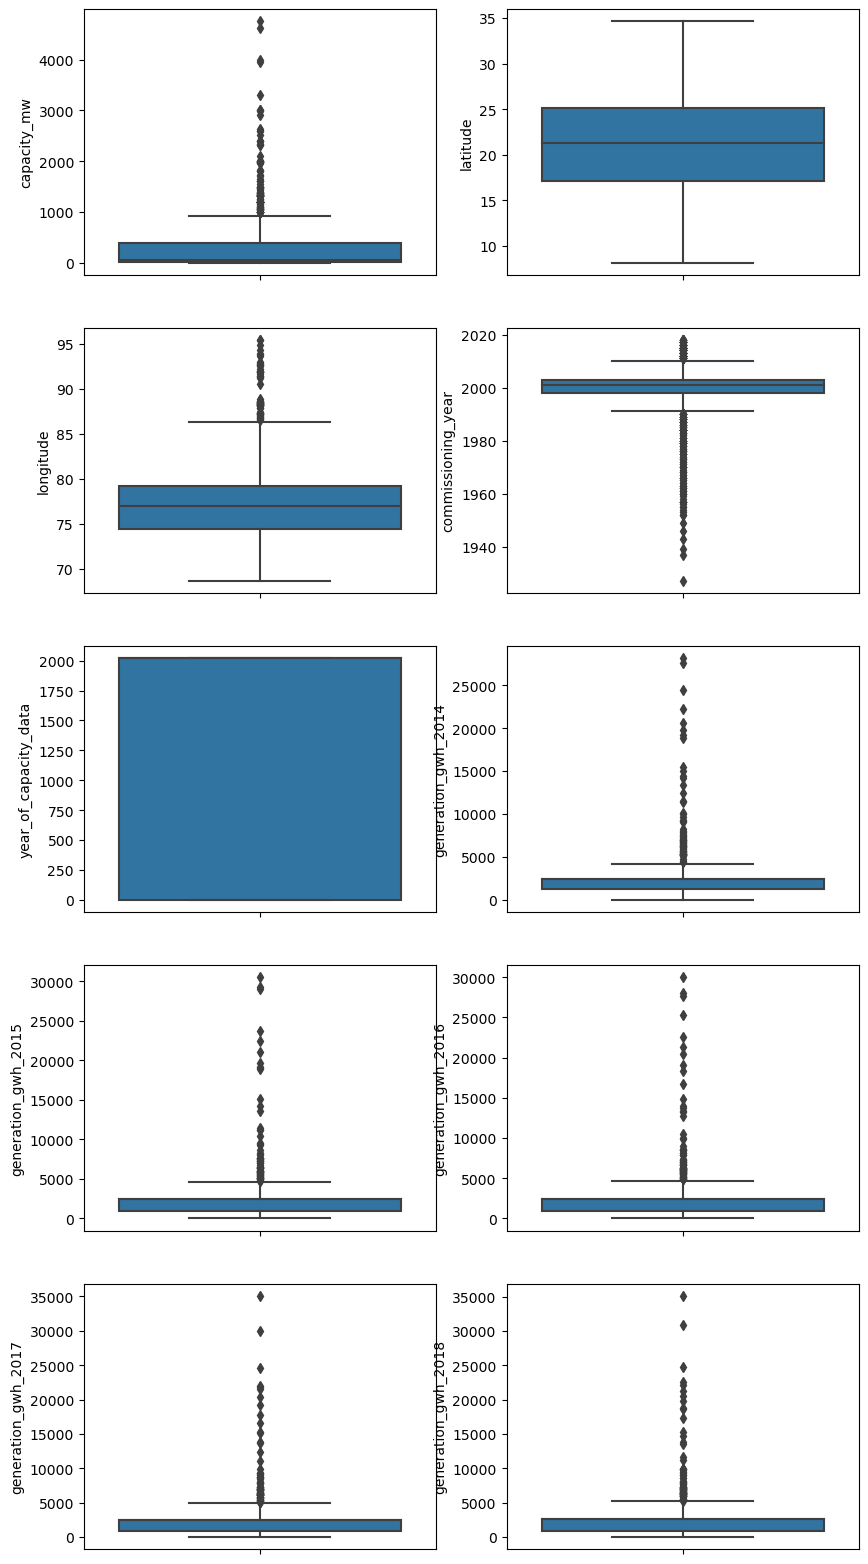

In [31]:
plt.figure(figsize=(10,20))
pn = 1
for i in num_col:
    sns.boxplot(y=df[i],ax=plt.subplot(5,2,pn))
    pn+=1

- There are Many outliers which are needed to be removed
- we shell use z-score for Removing outliers

In [32]:
prev = df.shape

In [33]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df[num_col]))
z[z>3].count()

capacity_mw              20
latitude                  0
longitude                16
commissioning_year       20
year_of_capacity_data     0
generation_gwh_2014      16
generation_gwh_2015      16
generation_gwh_2016      16
generation_gwh_2017      15
generation_gwh_2018      16
dtype: int64

In [34]:
df[num_col] = df[num_col][z<3]
df = df.dropna()
df.reset_index(drop=True,inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,3,2011.0,109,1,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,98.0,24.7663,74.6090,1,3,2001.0,174,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,39.2,21.9038,69.3732,7,3,2001.0,21,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,135.0,23.8712,91.3602,2,3,2004.0,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,1600.0,16.2949,77.3568,1,2,2016.0,22,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0
844,3.0,12.8932,78.1654,6,3,2001.0,77,0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
845,25.5,15.2758,75.5811,7,3,2001.0,21,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
846,80.0,24.3500,73.7477,1,3,2001.0,59,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


In [35]:
df.shape

(848, 15)

In [36]:
print('Data Loss % = ',np.round((prev[0]-df.shape[0])*100/prev[0],2),"%")

Data Loss % =  6.5 %


Since our data loss is only 6.5% we can continue

#### Corelation Analysis

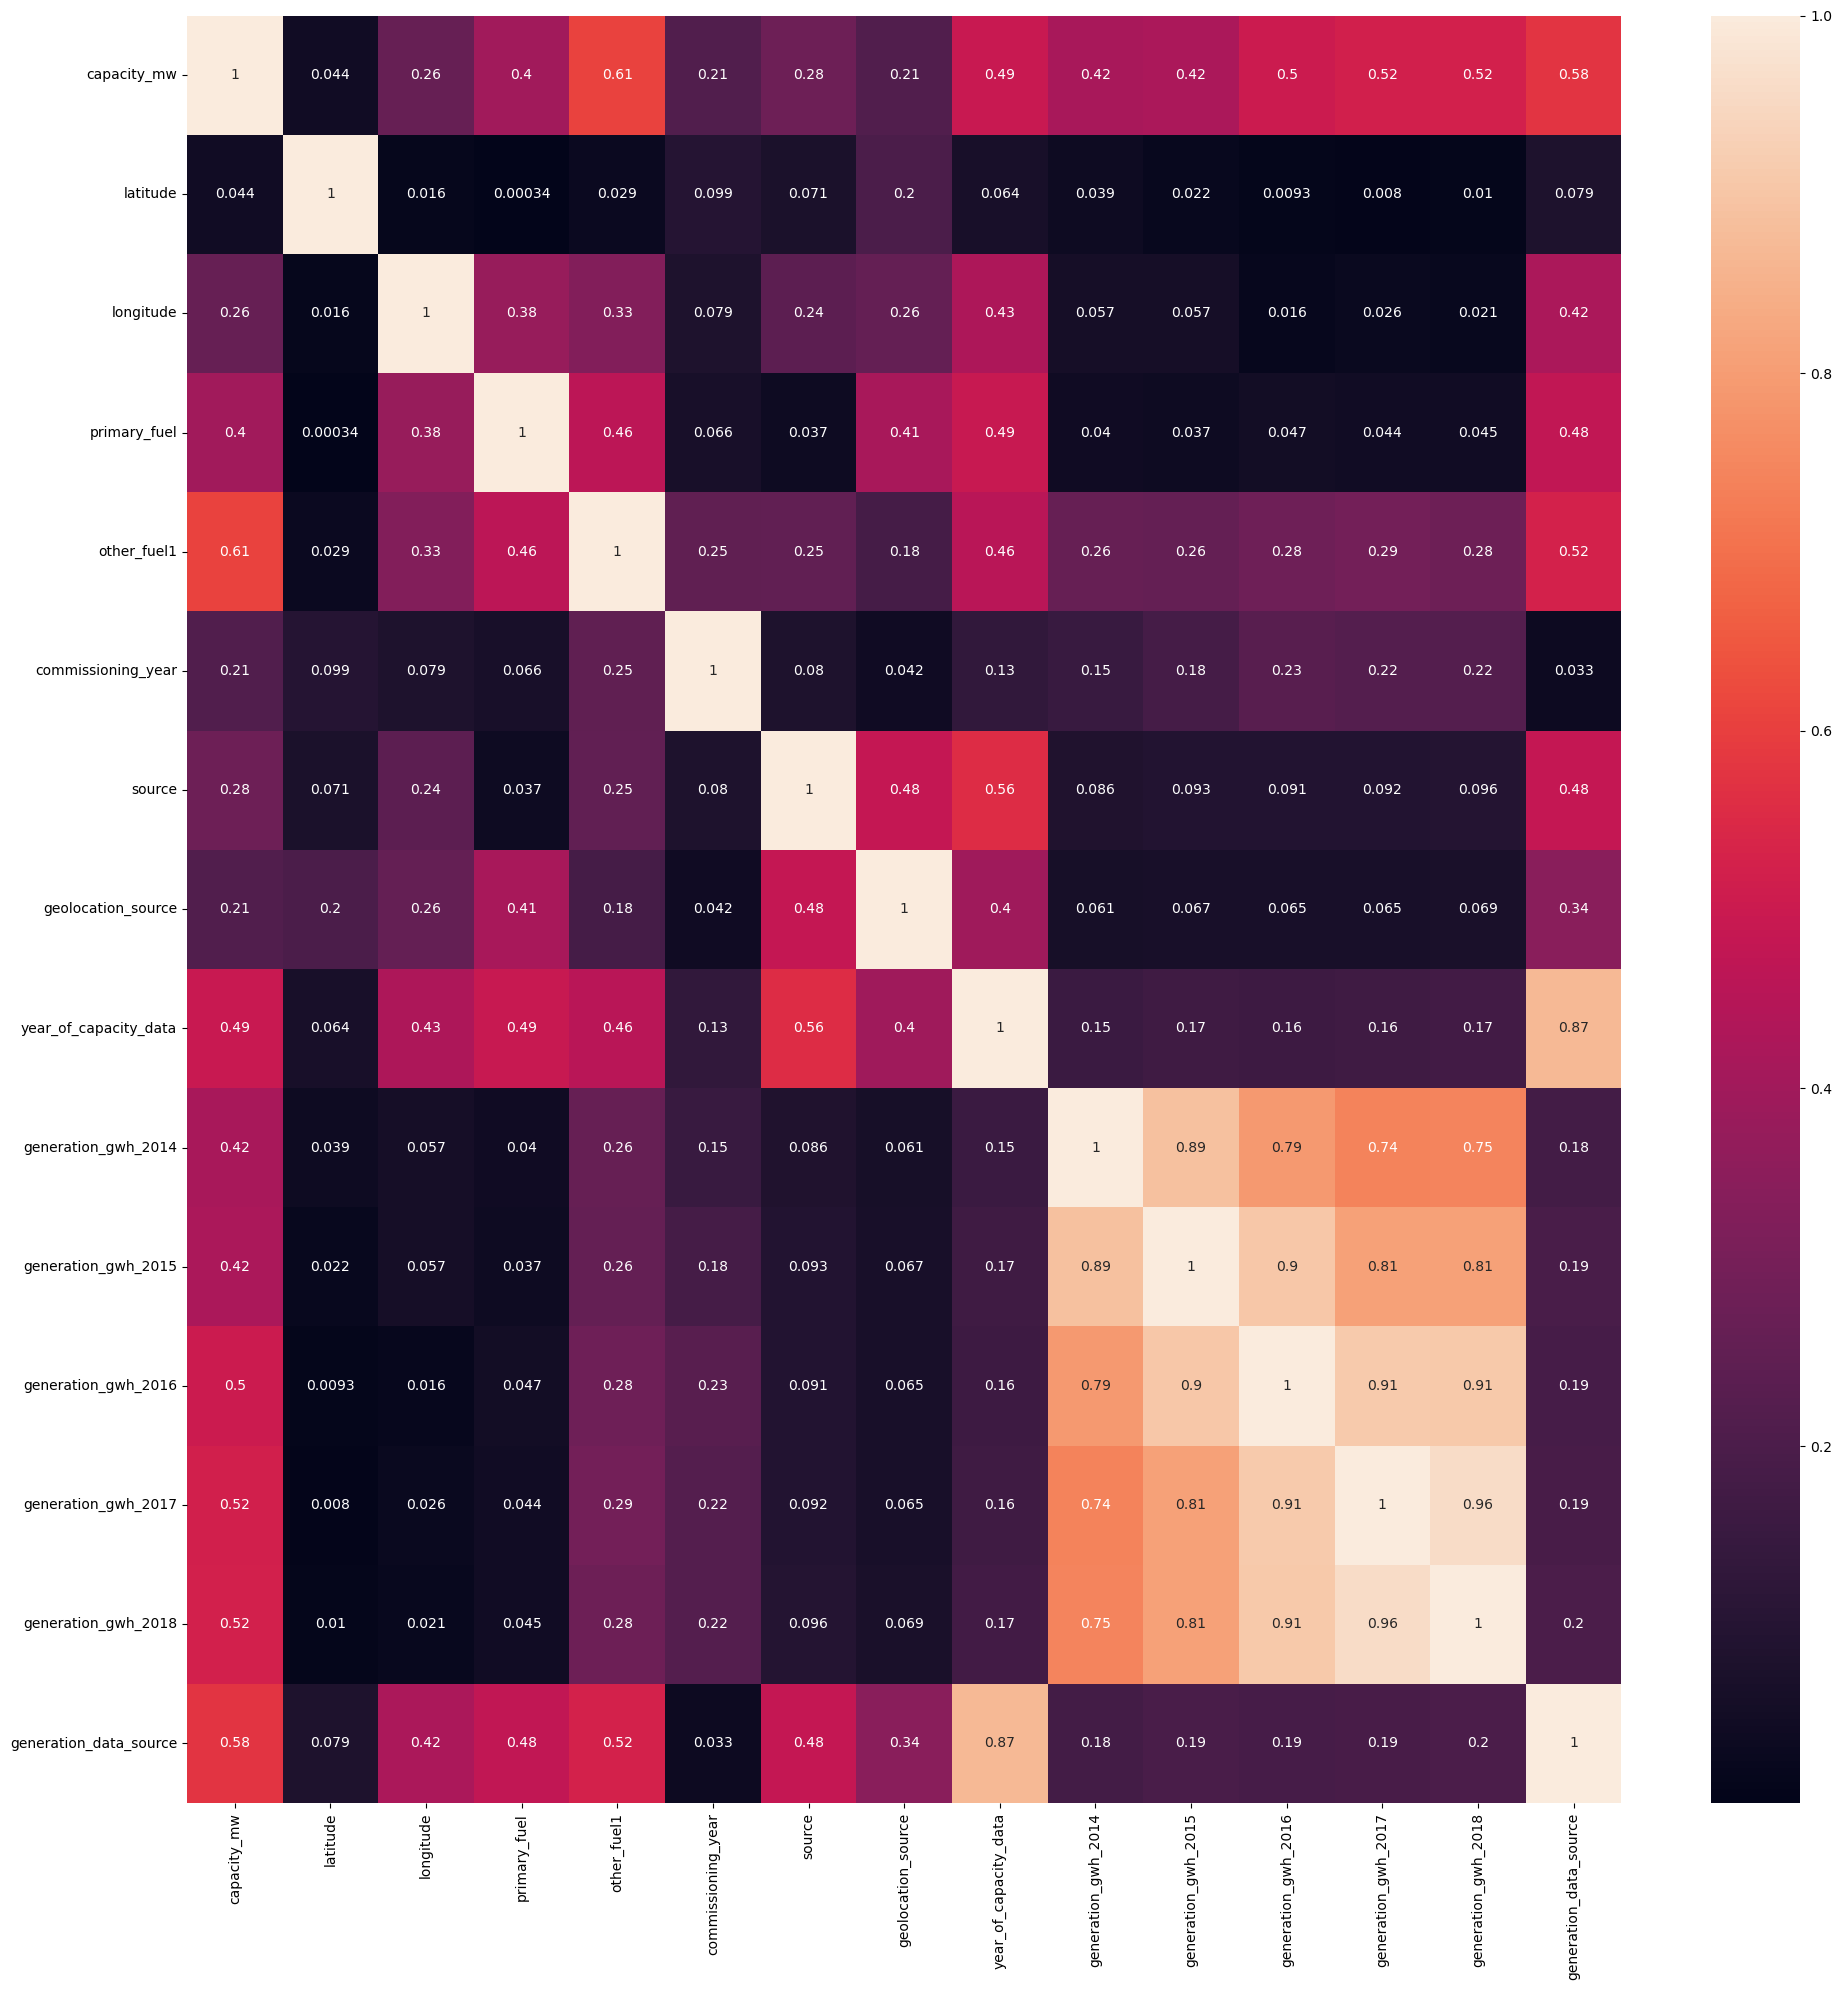

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10})
plt.tight_layout()

- There is High Multicolinearity in between generation_gwh columns.
- This may me because powerplants Power generation remains almost constant over years.
- For Column Reduction we can remove generation_gwh_2018 column

In [38]:
df=df.drop(columns=['generation_gwh_2018'])

# 1) Target : capacity_mw

In [39]:
x = df.drop(columns='capacity_mw')
y=df['capacity_mw']

In [40]:
x

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,28.1839,73.2407,6,3,2011.0,109,1,0.0,2431.823590,2428.226946,2467.936859,2547.759305,1
1,24.7663,74.6090,1,3,2001.0,174,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,1
2,21.9038,69.3732,7,3,2001.0,21,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,1
3,23.8712,91.3602,2,3,2004.0,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,0
4,21.9603,82.4091,1,2,2015.0,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,16.2949,77.3568,1,2,2016.0,22,2,2019.0,2431.823590,0.994875,233.596650,865.400000,0
844,12.8932,78.1654,6,3,2001.0,77,0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,1
845,15.2758,75.5811,7,3,2001.0,21,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,1
846,24.3500,73.7477,1,3,2001.0,59,2,0.0,2431.823590,2428.226946,2467.936859,2547.759305,1


In [41]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
843    1600.0
844       3.0
845      25.5
846      80.0
847      16.5
Name: capacity_mw, Length: 848, dtype: float64

In [42]:
# rmoving Latitude column since it is Very less contributing for capacity_mw
x.drop(columns='latitude',inplace=True)

### Skeweness

In [43]:
x.skew().abs()

longitude                 0.920196
primary_fuel              0.408046
other_fuel1               1.756146
commissioning_year        1.283893
source                    1.728645
geolocation_source        1.824088
year_of_capacity_data     0.175507
generation_gwh_2014       1.526419
generation_gwh_2015       1.389799
generation_gwh_2016       1.413018
generation_gwh_2017       1.278687
generation_data_source    0.104098
dtype: float64

In [44]:
# seperating skew columns
skew=[x.columns.tolist()[i] for i in np.where(x.skew().abs() > 0.5 )[0].tolist()]
skew

['longitude',
 'other_fuel1',
 'commissioning_year',
 'source',
 'geolocation_source',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

In [45]:
skew = skew[:1]+skew[4:]
skew

['longitude',
 'geolocation_source',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

In [46]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
x[skew] = pt.fit_transform(x[skew])
x

,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0.231715,6,3,2011.0,109,2.455955,0.0,137.610371,121.323481,113.336982,115.867091,1
1,0.231715,1,3,2001.0,174,9.484484,0.0,137.610371,121.323481,113.336982,115.867091,1
2,0.231715,7,3,2001.0,21,9.484484,0.0,137.610371,121.323481,113.336982,115.867091,1
3,0.231715,2,3,2004.0,22,9.484484,2019.0,63.097862,67.924976,65.406055,56.170393,0
4,0.231715,1,2,2015.0,22,9.484484,2019.0,155.984244,197.008775,185.710535,172.683124,0
...,...,...,...,...,...,...,...,...,...,...,...,...
843,0.231715,1,2,2016.0,22,9.484484,2019.0,137.610371,0.836342,31.568045,64.854619,0
844,0.231715,6,3,2001.0,77,0.000000,0.0,137.610371,121.323481,113.336982,115.867091,1
845,0.231715,7,3,2001.0,21,9.484484,0.0,137.610371,121.323481,113.336982,115.867091,1
846,0.231715,1,3,2001.0,59,9.484484,0.0,137.610371,121.323481,113.336982,115.867091,1


### Standerd Scaler

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,-0.928183,1.171962,0.498031,1.019610,1.394327,-1.489450,-1.091428,0.327549,0.356480,0.359793,0.360483,0.949392
1,-0.509687,-0.979172,0.498031,0.118673,2.816310,0.257184,-1.091428,0.327549,0.356480,0.359793,0.360483,0.949392
2,-2.362286,1.602189,0.498031,0.118673,-0.530818,0.257184,-1.091428,0.327549,0.356480,0.359793,0.360483,0.949392
3,2.441959,-0.548945,0.498031,0.388954,-0.508942,0.257184,0.916231,-1.044885,-0.730388,-0.682885,-0.904074,-1.053306
4,1.252953,-0.979172,-1.874612,1.379985,-0.508942,0.257184,0.916231,0.665974,1.896971,1.934190,1.564018,-1.053306
...,...,...,...,...,...,...,...,...,...,...,...,...
843,0.218948,-0.979172,-1.874612,1.470079,-0.508942,0.257184,0.916231,0.327549,-2.095903,-1.418990,-0.720116,-1.053306
844,0.408544,1.171962,0.498031,0.118673,0.694274,-2.099770,-1.091428,0.327549,0.356480,0.359793,0.360483,0.949392
845,-0.235946,1.602189,0.498031,0.118673,-0.530818,0.257184,-1.091428,0.327549,0.356480,0.359793,0.360483,0.949392
846,-0.768356,-0.979172,0.498031,0.118673,0.300494,0.257184,-1.091428,0.327549,0.356480,0.359793,0.360483,0.949392


### Train test Split

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr = LinearRegression()

In [49]:
# finding best random state
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    train_score = r2_score(y_train,pred_train)
    test_score = r2_score(y_test,pred_test)
    if round(train_score*100,0) == round(test_score*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_score*100,'Test accuracy':test_score*100},ignore_index=True)

    
tts_df.sort_values('Test accuracy',ascending=False)  


,Random state,Train accuracy,Test accuracy
24,613.0,75.500397,75.705779
14,478.0,75.523303,75.577628
5,198.0,75.263098,75.486025
21,570.0,75.390427,75.460645
30,708.0,75.163616,75.448990
20,568.0,75.494763,75.424505
12,438.0,75.224587,75.422286
7,233.0,75.441338,75.418803
9,270.0,75.413451,75.413367
18,549.0,75.456471,75.413226


- Therefore best random state is 242

In [50]:
# Training model at best Random state
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=242)

## Training models

#### Linear Regression

In [51]:
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
lr_pred_test = lr.predict(x_test)
lr_r2_test_score = r2_score(y_test,pred_test)
print(lr_r2_test_score*100,"%")

75.86184608751206 %


In [52]:
# Find best cv using k-fold
from sklearn.model_selection import KFold
for i in range(3,8):
    # Set the number of folds for cross-validation
    num_folds = i
    model=LinearRegression()

    # Create a KFold object
    kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

    # Initialize an empty list to store the MSE scores
    r2_scores = []

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(x_scaled):
        # Get the training and test sets for this fold
        X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
        y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

        # Fit the model on the training data
        model.fit(X_train_1, y_train_1)

        # Make predictions on the test data
        y_pred = model.predict(X_test_1)

        # Calculate the MSE for this fold and append to the list
        r2_scores.append(r2_score(y_test_1, y_pred))

    # Calculate the average MSE score
    avg_mse_score = np.mean(r2_scores)

    # Print the average MSE score
    print('CV = ',i,"Average r2 score:", round(avg_mse_score*100,5),'Difference = ',round(np.abs(avg_mse_score-lr_r2_test_score)*100,4))

CV =  3 Average r2 score: 73.92558 Difference =  1.9363
CV =  4 Average r2 score: 73.62791 Difference =  2.2339
CV =  5 Average r2 score: 74.02893 Difference =  1.8329
CV =  6 Average r2 score: 73.80421 Difference =  2.0576
CV =  7 Average r2 score: 74.01693 Difference =  1.8449


- cv = 5 is giving comparitively better result

In [53]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [54]:
#best cv score at cv = 3
cv = 5
# Set the number of folds for cross-validation
num_folds = cv
model=LinearRegression()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(lr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Linear regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(lr_r2_test_score*100,4),'Difference':round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  74.028933 % 
r2 score =  75.8618 % 
Difference =  1.8329 %



##### DecisionTreeRegressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred_test = dtr.predict(x_test)
dtr_r2_test_score = r2_score(y_test,dtr_pred_test)
print(dtr_r2_test_score*100,"%")

62.05869462434198 %


In [56]:
# Set the number of folds for cross-validation
num_folds = cv
model=DecisionTreeRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(dtr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Decision Tree regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(dtr_r2_test_score*100,4),'Difference':round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  62.886337 % 
r2 score =  62.0587 % 
Difference =  0.8276 %



##### RandomForestRegressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred_test = rfr.predict(x_test)
rfr_r2_test_score = r2_score(y_test,rfr_pred_test)

print(rfr_r2_test_score*100,"%")

79.37736623957673 %


In [58]:
# Set the number of folds for cross-validation
num_folds = cv
model=RandomForestRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(rfr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Random forest regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(rfr_r2_test_score*100,4),'Difference':round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  78.685081 % 
r2 score =  79.3774 % 
Difference =  0.6923 %



#### AdaBoostRegressor

In [59]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred_test = abr.predict(x_test)
abr_r2_test_score = r2_score(y_test,abr_pred_test)
print(abr_r2_test_score*100,"%")

69.66627059777562 %


In [60]:
# Set the number of folds for cross-validation
num_folds = cv
model=AdaBoostRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(abr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Ada Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(abr_r2_test_score*100,4),'Difference':round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  65.619965 % 
r2 score =  69.6663 % 
Difference =  4.0463 %



#### GradientBoostingRegressor

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred_test = gbr.predict(x_test)
gbr_r2_test_score = r2_score(y_test,gbr_pred_test)
print(gbr_r2_test_score*100,"%")

80.00415821210119 %


In [62]:
# Set the number of folds for cross-validation
num_folds = cv
model=GradientBoostingRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(gbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Gradient Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(gbr_r2_test_score*100,4),'Difference':round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  77.170327 % 
r2 score =  80.0042 % 
Difference =  2.8338 %



#### XGBRegressor

In [63]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
xgbr_pred_test = xgbr.predict(x_test)
xgbr_r2_test_score = r2_score(y_test,xgbr_pred_test)
print(xgbr_r2_test_score*100,"%")

75.44301812318056 %


In [64]:
# Set the number of folds for cross-validation
num_folds = cv
model=XGBRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x_scaled):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(xgbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':' XGBoost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(xgbr_r2_test_score*100,4),'Difference':round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  75.575055 % 
r2 score =  75.443 % 
Difference =  0.132 %



In [65]:
ms_df.sort_values(by='Test accuracy',ascending=False,ignore_index=True)

,Model,CV score,Test accuracy,Difference
0,Gradient Boost regression,77.1703,80.0042,2.8338
1,Random forest regression,78.6851,79.3774,0.6923
2,Linear regression,74.0289,75.8618,1.8329
3,XGBoost regression,75.5751,75.4430,0.1320
4,Ada Boost regression,65.6200,69.6663,4.0463
5,Decision Tree regression,62.8863,62.0587,0.8276


- Random forest regression is giving best cv scores with least Difference therefore we can use Random forest regression for our problem 

- since difference between CV score and Test accuracy is very less there is no over fitting

### Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV
grid_parm = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [67]:
gcv = GridSearchCV(estimator=RandomForestRegressor(),param_grid=grid_parm,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [68]:
final_model = RandomForestRegressor(criterion='mae',max_depth= 6,max_features ='sqrt',n_estimators= 200)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)

In [69]:
r2 = r2_score(y_test, final_model_test_pred)
mse_score = mean_absolute_error(y_test, final_model_test_pred)
print('\nR2 Score = ',r2,'\nMean Squared error = ',mse_score)


R2 Score =  0.8086976319898694 
Mean Squared error =  88.10745419117646


### Saving Model

In [70]:
import pickle
with open('final_RFC_Reg_model.pkl', 'wb') as file:

    pickle.dump(final_model, file)

##### from graph and r2 score we can confidently say that our model predicted 81.45% of data accurately

# 2) Target : primary_fuel

In [71]:
x = df.drop(columns='primary_fuel')
y=df['primary_fuel']

### Skeweness

In [72]:
x.skew().abs()

capacity_mw               1.978140
latitude                  0.114817
longitude                 0.920196
other_fuel1               1.756146
commissioning_year        1.283893
source                    1.728645
geolocation_source        1.824088
year_of_capacity_data     0.175507
generation_gwh_2014       1.526419
generation_gwh_2015       1.389799
generation_gwh_2016       1.413018
generation_gwh_2017       1.278687
generation_data_source    0.104098
dtype: float64

In [73]:
# seperating skew columns
skew=[x.columns.tolist()[i] for i in np.where(x.skew().abs() > 0.5 )[0].tolist()]
skew

['capacity_mw',
 'longitude',
 'other_fuel1',
 'commissioning_year',
 'source',
 'geolocation_source',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

In [74]:
skew = skew[:2]+skew[4:]
skew

['capacity_mw',
 'longitude',
 'source',
 'geolocation_source',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

In [75]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
x[skew] = pt.fit_transform(x[skew])
x

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,1.232949,28.1839,0.231715,3,2011.0,2.854766,2.455955,0.0,137.610371,121.323481,113.336982,115.867091,1
1,4.335919,24.7663,0.231715,3,2001.0,3.001747,9.484484,0.0,137.610371,121.323481,113.336982,115.867091,1
2,3.525104,21.9038,0.231715,3,2001.0,2.202358,9.484484,0.0,137.610371,121.323481,113.336982,115.867091,1
3,4.617177,23.8712,0.231715,3,2004.0,2.223860,9.484484,2019.0,63.097862,67.924976,65.406055,56.170393,0
4,6.822705,21.9603,0.231715,2,2015.0,2.223860,9.484484,2019.0,155.984244,197.008775,185.710535,172.683124,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,6.725341,16.2949,0.231715,2,2016.0,2.223860,9.484484,2019.0,137.610371,0.836342,31.568045,64.854619,0
844,1.362059,12.8932,0.231715,3,2001.0,2.735211,0.000000,0.0,137.610371,121.323481,113.336982,115.867091,1
845,3.143847,15.2758,0.231715,3,2001.0,2.202358,9.484484,0.0,137.610371,121.323481,113.336982,115.867091,1
846,4.156995,24.3500,0.231715,3,2001.0,2.637294,9.484484,0.0,137.610371,121.323481,113.336982,115.867091,1


### Standerdization

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)

### Train test Split

In [77]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [78]:
# creating df for storing acuracy  score
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])

In [79]:
# finding best random state
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train = log_reg.predict(x_train)
    pred_test = log_reg.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    if round(train_acc*100,0) == round(test_acc*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_acc*100,'Test accuracy':test_acc*100},ignore_index=True)

    
tts_df.sort_values('Train accuracy',ascending=False)  

    
    

,Random state,Train accuracy,Test accuracy
23,182.0,86.135693,85.882353
10,104.0,85.693215,86.470588
12,108.0,85.398230,85.294118
19,153.0,85.398230,85.294118
18,150.0,85.398230,85.294118
15,131.0,85.398230,85.294118
24,183.0,85.398230,85.294118
20,155.0,85.250737,85.294118
6,60.0,85.250737,85.294118
1,21.0,85.250737,85.294118


- we can observe that Random state 198 we get max accuracy wit minimum difference

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=198)

### Training the model

Logistic regression 

In [81]:
# Training
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_test_pred=lr.predict(x_test)
print (accuracy_score(y_test,lr_test_pred))

0.8584905660377359


In [82]:
# Find best cv
from sklearn.model_selection import cross_val_score
lr_ac_score = accuracy_score(y_test,lr_test_pred)*100
for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x_scaled,y,cv=i)
    lr_cv_score_mean = lr_cv_score.mean()
    print('\ncv = ',i,'\nCross Validation score = ',lr_cv_score_mean*100,'\nAccuracy score',lr_ac_score,end = '\n\n')
    


cv =  2 
Cross Validation score =  83.72641509433963 
Accuracy score 85.84905660377359




cv =  3 
Cross Validation score =  83.49372227652057 
Accuracy score 85.84905660377359


cv =  4 
Cross Validation score =  84.7877358490566 
Accuracy score 85.84905660377359


cv =  5 
Cross Validation score =  83.84824225548208 
Accuracy score 85.84905660377359


cv =  6 
Cross Validation score =  83.84527020277694 
Accuracy score 85.84905660377359


cv =  7 
Cross Validation score =  83.96655505448352 
Accuracy score 85.84905660377359


cv =  8 
Cross Validation score =  83.25471698113208 
Accuracy score 85.84905660377359


cv =  9 
Cross Validation score =  84.20554933432872 
Accuracy score 85.84905660377359



- cv = 4 is giving best result

In [83]:
cv =4

In [84]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [85]:
lr_s_cv_score=cross_val_score(lr,x_scaled,y,cv=cv)
lr_s_cv_score_mean = lr_s_cv_score.mean()
print('\nCross Validation score = ',lr_s_cv_score_mean*100,'\nAccuracy score = ',lr_ac_score,'\nDifference = ',lr_ac_score-(lr_s_cv_score_mean*100))
ms_df = ms_df.append({'Model':'Logistic regression','CV score':round(lr_s_cv_score_mean*100,2),'Test accuracy':round(lr_ac_score,2),'Difference':round(np.abs(lr_ac_score-(lr_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  84.7877358490566 
Accuracy score =  85.84905660377359 
Difference =  1.0613207547169878


##### Random  forest classifer

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_test_pred=rfc.predict(x_test)
rfc_ac_score = accuracy_score(y_test,rfc_test_pred)*100
print (rfc_ac_score)

90.56603773584906


In [87]:
# cross validation
rfc_s_cv_score=cross_val_score(rfc,x_scaled,y,cv=cv)
rfc_s_cv_score_mean = rfc_s_cv_score.mean()
print('\nCross Validation score = ',rfc_s_cv_score_mean*100,'\nAccuracy score = ',rfc_ac_score,'\nDifference = ',(rfc_s_cv_score_mean*100)-rfc_ac_score)
ms_df = ms_df.append({'Model':'Random forest classifier','CV score':round(rfc_s_cv_score_mean*100,2),'Test accuracy':round(rfc_ac_score,2),'Difference':round(np.abs(rfc_ac_score-(rfc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  89.85849056603774 
Accuracy score =  90.56603773584906 
Difference =  -0.7075471698113205


##### AdaBoostClassifier

In [88]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_test_pred=abc.predict(x_test)
abc_ac_score = accuracy_score(y_test,abc_test_pred)*100
print (abc_ac_score)

43.39622641509434


In [89]:
# cross validation
abc_s_cv_score=cross_val_score(abc,x_scaled,y,cv=cv)
abc_s_cv_score_mean = abc_s_cv_score.mean()
print('\nCross Validation score = ',abc_s_cv_score_mean*100,'\nAccuracy score = ',abc_ac_score,'\nDifference = ',(abc_s_cv_score_mean*100)-abc_ac_score)
ms_df = ms_df.append({'Model':'Adaboost classifier','CV score':round(abc_s_cv_score_mean*100,2),'Test accuracy':round(abc_ac_score,2),'Difference':round(np.abs(abc_ac_score-(abc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  47.87735849056604 
Accuracy score =  43.39622641509434 
Difference =  4.481132075471699


##### XGBClassifier

In [90]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_test_pred=xgb.predict(x_test)
xgb_ac_score = accuracy_score(y_test,xgb_test_pred)*100
print (xgb_ac_score)

88.67924528301887


In [91]:
# cross validation
xgb_s_cv_score=cross_val_score(xgb,x_scaled,y,cv=cv)
xgb_s_cv_score_mean = xgb_s_cv_score.mean()
print('\nCross Validation score = ',xgb_s_cv_score_mean*100,'\nAccuracy score = ',xgb_ac_score,'\nDifference = ',(xgb_s_cv_score_mean*100)-xgb_ac_score)
ms_df = ms_df.append({'Model':'XGBOOST classifier','CV score':round(xgb_s_cv_score_mean*100,2),'Test accuracy':round(xgb_ac_score,2),'Difference':round(np.abs(xgb_ac_score-(xgb_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  90.33018867924528 
Accuracy score =  88.67924528301887 
Difference =  1.6509433962264097


##### KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_test_pred=knn.predict(x_test)
knn_ac_score = accuracy_score(y_test,knn_test_pred)*100
print (knn_ac_score)

88.67924528301887


In [93]:
# cross validation
knn_s_cv_score=cross_val_score(knn,x_scaled,y,cv=cv)
knn_s_cv_score_mean = knn_s_cv_score.mean()
print('\nCross Validation score = ',knn_s_cv_score_mean*100,'\nAccuracy score = ',knn_ac_score,'\nDifference = ',(knn_s_cv_score_mean*100)-knn_ac_score)
ms_df = ms_df.append({'Model':'KNN Classifier','CV score':round(knn_s_cv_score_mean*100,2),'Test accuracy':round(knn_ac_score,2),'Difference':round(np.abs(knn_ac_score-(knn_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  86.79245283018868 
Accuracy score =  88.67924528301887 
Difference =  -1.8867924528301927


In [94]:
ms_df.sort_values('Test accuracy',ascending=False)

,Model,CV score,Test accuracy,Difference
1,Random forest classifier,89.86,90.57,0.71
3,XGBOOST classifier,90.33,88.68,1.65
4,KNN Classifier,86.79,88.68,1.89
0,Logistic regression,84.79,85.85,1.06
2,Adaboost classifier,47.88,43.40,4.48


- we can observe that Random Forest classifier is giving good accuracy and with lesser difference between cross val score and Test accuracy score

### Hyperparameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [75,100,125], 
    'min_samples_split': [2,3, 5,], 
    'criterion' : ["gini", "entropy"]
    
}

In [96]:
# using grid search cv
gcv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5)
gcv.fit(x_train,y_train)

# Printing the best parameters
print("Best parameters:", gcv.best_params_)

Best parameters: {'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 125}


# Training with best parms

In [97]:
final_model = RandomForestClassifier(criterion= 'gini', min_samples_split= 3, n_estimators= 100)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)
final_model_ac_score = accuracy_score(y_test,final_model_test_pred)*100
print (final_model_ac_score)

91.0377358490566


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.92      0.98      0.95        62
           2       0.50      0.33      0.40        12
           3       0.90      0.98      0.94        65
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        26
           7       0.93      1.00      0.97        28

    accuracy                           0.91       212
   macro avg       0.66      0.62      0.63       212
weighted avg       0.89      0.91      0.90       212



### Saving Model

In [99]:
import pickle
with open('final_rfc_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

### conclusion

Our Final models gives best Accuracy score Hence it is the best model for our data

- primary_fuel model gives 91% Accuracy
- capacity_mw model gives 81.45% Accuracy